In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from PIL import Image
import statistics
import math
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.transform import resize
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
import os 
import matplotlib.pyplot as plt
import cv2
import glob
import random
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.applications.vgg19 import VGG19
# output architecture diagram
# import visualkeras
from PIL import ImageFont
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose, UpSampling2D, Dropout, concatenate

In [5]:
import re

# define a function to extract the numeric part of the file name
def get_numeric_part(filename):
    match = re.search(r'\d+', filename)
    if match:
        return int(match.group())
    return 0

# read LR images from x1 folder
lr_list = sorted(os.listdir("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/LR"), key=get_numeric_part)
lr_images = []
for img in lr_list:
    img_lr = cv2.imread("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/LR/" + img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
    lr_images.append(img_lr)

# read HR images from interpolated folder
hr_list = sorted(os.listdir("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/HR"), key=get_numeric_part)
hr_images = []
for img in hr_list:
    img_hr = cv2.imread("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/HR/" + img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
    hr_images.append(img_hr)

lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

In [6]:
lr_images = lr_images/ 255.
hr_images = hr_images / 255.

In [9]:
# Calaculate Bicubic Interpolation
from skimage.transform import resize
bicubic_interpolated_images = resize(lr_images, (lr_images.shape[0], 240, 240,3))

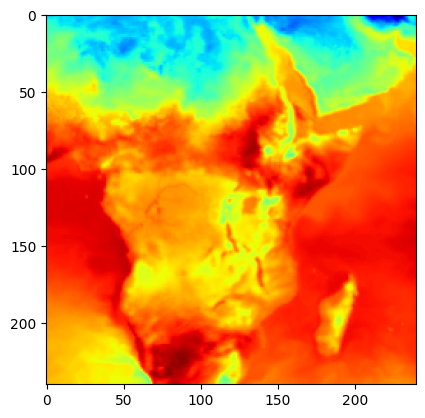

In [7]:
plt.imshow(hr_images[91])

In [8]:
#SRCNN
input_layer = tf.keras.layers.Input(shape=(240, 240, 3), name = "input_layer")
a = tf.keras.layers.Conv2D(64, (9,9), padding="same",  name="Conv1")(input_layer)
b = tf.keras.layers.ReLU()(a)
c = tf.keras.layers.Conv2D(32, (1,1), padding="same", name="Conv2")(b)
d = tf.keras.layers.ReLU()(c)
e = tf.keras.layers.Conv2D(3, (5,5), padding="same", name = "output_layer")(d)
model_SRCNN = tf.keras.models.Model(inputs=[input_layer], outputs=[e])
model_SRCNN.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 240, 240, 3)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 240, 240, 64)      15616     
                                                                 
 re_lu (ReLU)                (None, 240, 240, 64)      0         
                                                                 
 Conv2 (Conv2D)              (None, 240, 240, 32)      2080      
                                                                 
 re_lu_1 (ReLU)              (None, 240, 240, 32)      0         
                                                                 
 output_layer (Conv2D)       (None, 240, 240, 3)       2403      
                                                                 
Total params: 20099 (78.51 KB)
Trainable params: 20099 (78.5

In [10]:
model_SRCNN.load_weights('SRCNN.h5')

In [11]:
# Assuming you have the test data loaded in a variable named 'test_data'
predictions = model_SRCNN.predict(bicubic_interpolated_images, verbose =1)

6/6 [==============================] - 1s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


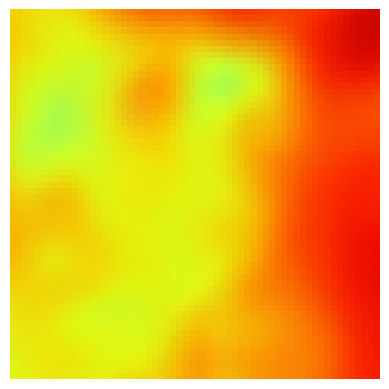

In [13]:
import matplotlib.pyplot as plt

# Assuming hr_images is your image data and im_num is the index of the image you want to plot
# Example data for demonstration purposes

# Define the coordinates for the zoomed-in portion
# x_start, x_end = 88, 148
# y_start, y_end = 164, 224
x_start, x_end = 110, 170
y_start, y_end = 110, 170

fig, ax = plt.subplots()

# Crop and plot the zoomed-in portion of the image
zoomed_in_image = predictions[91, y_start:y_end, x_start:x_end, :]
ax.imshow(zoomed_in_image)
plt.axis('off')

plt.show()

In [14]:
im_num = 91
x_start_lr = x_start * 60 // hr_images.shape[2]
x_end_lr = x_end * 60 // hr_images.shape[2]
y_start_lr = y_start * 60 // hr_images.shape[1]
y_end_lr = y_end * 60 // hr_images.shape[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


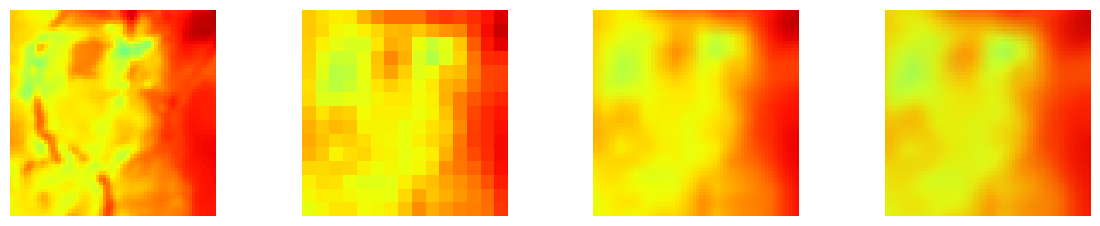

In [17]:
import matplotlib as mpl
contour_val = 40
import pandas as pd
import numpy as np
import seaborn
import seaborn as sns
from matplotlib.patches import Rectangle

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline


#latex settings
#usetex needs modification
import matplotlib as mpl
import seaborn

%matplotlib inline

# Latex settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = True
seaborn.set(style='ticks')
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2.42))
plt.subplots_adjust(wspace=0.2)

for ax in axes:
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["right"].set_color("black")
    ax.spines["top"].set_color("black")
    ax.tick_params(bottom=True, top=False, left=True, right=False)


plt.subplot(141)
plt.imshow(hr_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(142)
plt.imshow(lr_images[im_num, y_start_lr:y_end_lr, x_start_lr:x_end_lr, :], cmap=plt.get_cmap('jet'))
plt.axis('off')



plt.subplot(143)
plt.imshow(bicubic_interpolated_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(144)
plt.imshow(predictions[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.tight_layout()
plt.show()

In [18]:
#FSRCNN

def build_super_resolution_model():
    model = tf.keras.Sequential()
    
    conv_args = {
        "activation": "relu",
        "kernel_initializer": "Orthogonal",
        "padding": "same",
    }
    inputs = keras.Input(shape=(60, 60, 3))
    x = layers.Conv2D(64, 5, **conv_args)(inputs)
    x = layers.Conv2D(32, 1, **conv_args)(x)
    x = layers.Conv2D(12, 3, **conv_args)(x)
#     x = layers.Dropout(0.25) (x)
    x = layers.Conv2D(12, 3, **conv_args)(x)
    x = layers.Conv2DTranspose(1, (3, 3), strides=(4, 4), **conv_args)(x)
   

    
    # Additional convolutional layers
    x = layers.Conv2D(64, 3, **conv_args)(x)
#     x = layers.Dropout(0.25) (x)
    x = layers.Conv2D(32, 3, **conv_args)(x)
#     x = tf.nn.depth_to_space(x, 4)
    outputs = layers.Conv2D(3, 1, **conv_args)(x)
    
    
    return keras.Model(inputs, outputs)

# Build the super-resolution model
model = build_super_resolution_model()

# Print model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 12)        3468      
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 12)        1308      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 240, 240, 1)       109       
 anspose)                                                        
                                                           

In [19]:
model.load_weights('FSRCNN_ESM2.h5')

In [20]:
# Assuming you have the test data loaded in a variable named 'test_data'
predictions = model.predict(lr_images)

6/6 [==============================] - 1s 71ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


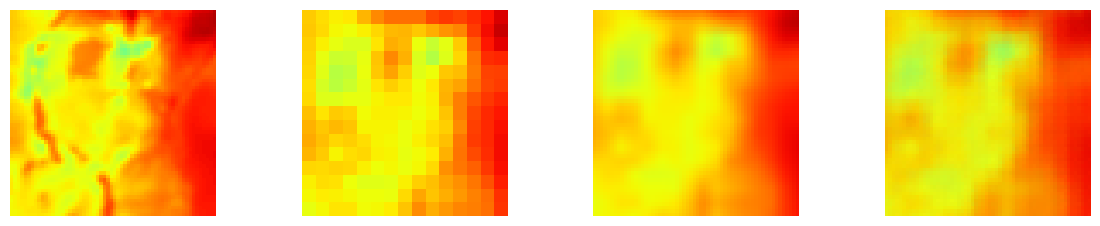

In [21]:

%matplotlib inline

# Latex settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = True
seaborn.set(style='ticks')
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2.42))
plt.subplots_adjust(wspace=0.2)

for ax in axes:
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["right"].set_color("black")
    ax.spines["top"].set_color("black")
    ax.tick_params(bottom=True, top=False, left=True, right=False)


plt.subplot(141)
plt.imshow(hr_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(142)
plt.imshow(lr_images[im_num, y_start_lr:y_end_lr, x_start_lr:x_end_lr, :], cmap=plt.get_cmap('jet'))
plt.axis('off')



plt.subplot(143)
plt.imshow(bicubic_interpolated_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(144)
plt.imshow(predictions[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.tight_layout()
plt.show()

In [23]:
#ESPCNN
def get_model(upscale_factor=4, channels=3):
    conv_args = {
        "activation": "relu",
        "kernel_initializer": "Orthogonal",
        "padding": "same",
    }
    inputs = keras.Input(shape=(60,60,3))
    x = layers.Conv2D(64, 5, **conv_args)(inputs)
    x = layers.Conv2D(64, 3, **conv_args)(x)
    x = layers.Conv2D(32, 3, **conv_args)(x)
    x = layers.Conv2D(3 * (upscale_factor ** 2), 3, **conv_args)(x)
    outputs = tf.nn.depth_to_space(x, upscale_factor)

    return keras.Model(inputs, outputs)
upscale_factor = 4


model = get_model(upscale_factor=upscale_factor, channels=1)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        4864      
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 48)        13872     
                                                                 
 tf.nn.depth_to_space (TFOp  (None, 240, 240, 3)       0         
 Lambda)                                                         
                                                           

In [25]:
model.load_weights('EPSCNN.h5')

In [26]:
# Assuming you have the test data loaded in a variable named 'test_data'
predictions = model.predict([lr_images], verbose =1)

6/6 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


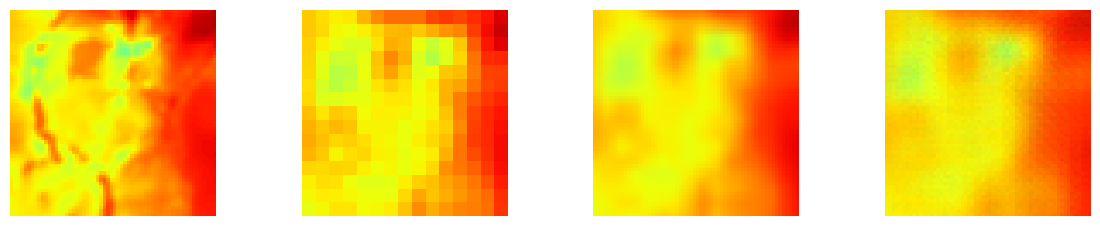

In [27]:

%matplotlib inline

# Latex settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = True
seaborn.set(style='ticks')
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2.42))
plt.subplots_adjust(wspace=0.2)

for ax in axes:
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["right"].set_color("black")
    ax.spines["top"].set_color("black")
    ax.tick_params(bottom=True, top=False, left=True, right=False)


plt.subplot(141)
plt.imshow(hr_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(142)
plt.imshow(lr_images[im_num, y_start_lr:y_end_lr, x_start_lr:x_end_lr, :], cmap=plt.get_cmap('jet'))
plt.axis('off')



plt.subplot(143)
plt.imshow(bicubic_interpolated_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(144)
plt.imshow(predictions[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.tight_layout()
plt.show()

In [28]:
#EDRN
class EDSRModel(tf.keras.Model):
    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

    def predict_step(self, x):
        # Adding dummy dimension using tf.expand_dims and converting to float32 using tf.cast
        x = tf.cast(tf.expand_dims(x, axis=0), tf.float32)
        # Passing low resolution image to model
        super_resolution_img = self(x, training=False)
        # Clips the tensor from min(0) to max(255)
        super_resolution_img = tf.clip_by_value(super_resolution_img, 0, 255)
        # Rounds the values of a tensor to the nearest integer
        super_resolution_img = tf.round(super_resolution_img)
        # Removes dimensions of size 1 from the shape of a tensor and converting to uint8
        super_resolution_img = tf.squeeze(
            tf.cast(super_resolution_img, tf.uint8), axis=0
        )
        return super_resolution_img


# Residual Block
def ResBlock(inputs):
    x = layers.Conv2D(64, 3, padding="same", activation="relu")(inputs)
    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.Add()([inputs, x])
    return x


# Upsampling Block
def Upsampling(inputs, factor=2, **kwargs):
    x = layers.Conv2D(64 * (factor ** 2), 3, padding="same", **kwargs)(inputs)
    x = tf.nn.depth_to_space(x, block_size=factor)
    x = layers.Conv2D(64 * (factor ** 2), 3, padding="same", **kwargs)(x)
    x = tf.nn.depth_to_space(x, block_size=factor)
    return x


def make_model(num_filters, num_of_residual_blocks):
    # Flexible Inputs to input_layer
    input_layer = layers.Input(shape=(60, 60, 3))
    # Scaling Pixel Values
    x = layers.Rescaling(scale=1.0 / 255)(input_layer)
    x = x_new = layers.Conv2D(num_filters, 3, padding="same")(x)

    # 16 residual blocks
    for _ in range(num_of_residual_blocks):
        x_new = ResBlock(x_new)

    x_new = layers.Conv2D(num_filters, 3, padding="same")(x_new)
    x = layers.Add()([x, x_new])

    x = Upsampling(x)
    x = layers.Conv2D(3, 3, padding="same")(x)

    output_layer = layers.Rescaling(scale=255)(x)
    return EDSRModel(input_layer, output_layer)


model_EDRN = make_model(num_filters=64, num_of_residual_blocks=16)

model_EDRN.summary()

Model: "edsr_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 60, 60, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 60, 60, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 60, 60, 64)           1792      ['rescaling[0][0]']           
                                                                                                  
 conv2d_12 (Conv2D)          (None, 60, 60, 64)           36928     ['conv2d_11[0][0]']           
                                                                                         

 add_10 (Add)                (None, 60, 60, 64)           0         ['add_9[0][0]',               
                                                                     'conv2d_33[0][0]']           
                                                                                                  
 conv2d_34 (Conv2D)          (None, 60, 60, 64)           36928     ['add_10[0][0]']              
                                                                                                  
 conv2d_35 (Conv2D)          (None, 60, 60, 64)           36928     ['conv2d_34[0][0]']           
                                                                                                  
 add_11 (Add)                (None, 60, 60, 64)           0         ['add_10[0][0]',              
                                                                     'conv2d_35[0][0]']           
                                                                                                  
 conv2d_36

In [52]:
import re

# define a function to extract the numeric part of the file name
def get_numeric_part(filename):
    match = re.search(r'\d+', filename)
    if match:
        return int(match.group())
    return 0

# read LR images from x1 folder
lr_list = sorted(os.listdir("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/LR"), key=get_numeric_part)
lr_images = []
for img in lr_list:
    img_lr = cv2.imread("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/LR/" + img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
    lr_images.append(img_lr)

# read HR images from interpolated folder
hr_list = sorted(os.listdir("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/HR"), key=get_numeric_part)
hr_images = []
for img in hr_list:
    img_hr = cv2.imread("C:/Users/lff19/OneDrive - Texas State University/Nikhil Pawar/Climate_Comparison/Data/Demo_Data/1/HR/" + img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
    hr_images.append(img_hr)

lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

In [53]:
# Load the model
model_EDRN.load_weights('EDRN.h5')

In [54]:
predictions = []
# Assuming you have the low-resolution training data loaded in a variable named 'lr_train'
for i in range(lr_images.shape[0]):
    prediction = model_EDRN.predict(lr_images[i])
    predictions.append(prediction)

2/2 [==============================] - 0s 23ms/step


In [57]:
predictions.shape

(180, 240, 240, 3)

In [60]:
predictions = np.array(predictions)
hr_images = hr_images / 255.
lr_images = lr_images / 255.
predictions = predictions / 255.

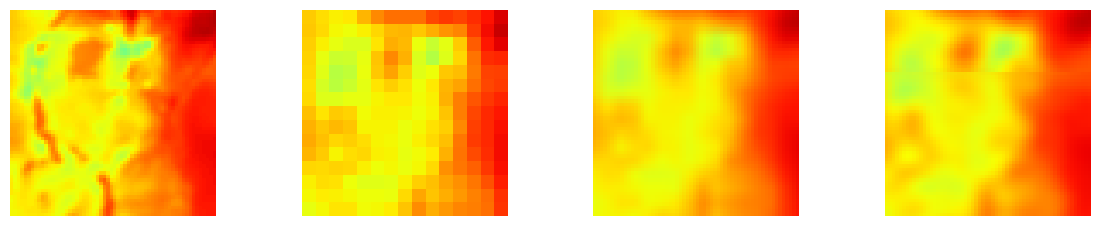

In [61]:

%matplotlib inline

# Latex settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = True
seaborn.set(style='ticks')
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2.42))
plt.subplots_adjust(wspace=0.2)

for ax in axes:
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["right"].set_color("black")
    ax.spines["top"].set_color("black")
    ax.tick_params(bottom=True, top=False, left=True, right=False)


plt.subplot(141)
plt.imshow(hr_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(142)
plt.imshow(lr_images[im_num, y_start_lr:y_end_lr, x_start_lr:x_end_lr, :], cmap=plt.get_cmap('jet'))
plt.axis('off')



plt.subplot(143)
plt.imshow(bicubic_interpolated_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(144)
plt.imshow(predictions[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.tight_layout()
plt.show()

In [63]:
#SRGAN
from keras.models import load_model
model = load_model("SRGAN.h5",compile=False)

In [64]:
predictions = model.predict([lr_images],verbose = 1)

6/6 [==============================] - 13s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


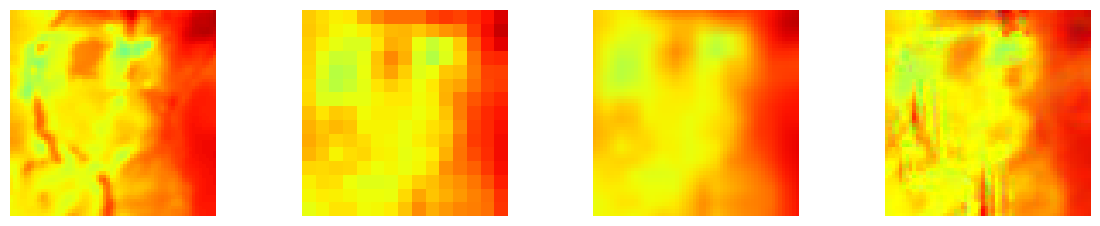

In [65]:
%matplotlib inline

# Latex settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = True
seaborn.set(style='ticks')
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2.42))
plt.subplots_adjust(wspace=0.2)

for ax in axes:
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["right"].set_color("black")
    ax.spines["top"].set_color("black")
    ax.tick_params(bottom=True, top=False, left=True, right=False)


plt.subplot(141)
plt.imshow(hr_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(142)
plt.imshow(lr_images[im_num, y_start_lr:y_end_lr, x_start_lr:x_end_lr, :], cmap=plt.get_cmap('jet'))
plt.axis('off')



plt.subplot(143)
plt.imshow(bicubic_interpolated_images[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.subplot(144)
plt.imshow(predictions[im_num, y_start:y_end, x_start:x_end, :], cmap=plt.get_cmap('jet'))
plt.axis('off')


plt.tight_layout()
plt.show()